IMPORT LIBRARY

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

READ DATASET

In [3]:
df = pd.read_excel("fruit.xlsx")

print(df)

      diameter  weight  red  green  blue        name
0         2.96   86.76  172     85     2      orange
1         3.91   88.05  166     78     3      orange
2         4.42   95.17  156     81     2      orange
3         4.47   95.60  163     81     4      orange
4         4.48   95.76  161     72     9      orange
...        ...     ...  ...    ...   ...         ...
9995     15.35  253.89  149     77    20  grapefruit
9996     15.41  254.67  148     68     7  grapefruit
9997     15.59  256.50  168     82    20  grapefruit
9998     15.92  260.14  142     72    11  grapefruit
9999     16.45  261.51  152     74     2  grapefruit

[10000 rows x 6 columns]


EKSPLORASI DATA

In [4]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [5]:
df.isnull().sum()

diameter    0
weight      0
red         0
green       0
blue        0
name        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [7]:
df.name.value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

SPLITING DATA

In [8]:
x = df.iloc[: , [0, 1, 2, 3, 4]].values
y = df.iloc[:, [5]].values

In [9]:
x

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [ 15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [ 16.45, 261.51, 152.  ,  74.  ,   2.  ]])

In [10]:
y

array([['orange'],
       ['orange'],
       ['orange'],
       ...,
       ['grapefruit'],
       ['grapefruit'],
       ['grapefruit']], dtype=object)

FEATURE SCALING

In [11]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [12]:
x

array([[-3.60195018, -3.02255396,  1.73997781,  0.76780981, -1.03337209],
       [-3.11420697, -2.978392  ,  1.16484825,  0.16992022, -0.92300682],
       [-2.85236589, -2.73464536,  0.20629897,  0.42615862, -1.03337209],
       ...,
       [ 2.88246734,  2.78833864,  1.3565581 ,  0.51157142,  0.95320276],
       [ 3.05189393,  2.91295068, -1.13567001, -0.34255657, -0.04008467],
       [ 3.32400329,  2.95985137, -0.17712073, -0.17173097, -1.03337209]])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size= 0.9, random_state=0)

In [14]:
print("X_train :", (len(x_train)))
print("X_test :", (len(x_test)))
print("Y_train :", (len(y_train)))
print("Y_test :", (len(y_test)))

X_train : 1000
X_test : 9000
Y_train : 1000
Y_test : 9000


MEMBUAT MODEL RANDOM FOREST

In [15]:
# Membuat model Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=0)

# Latih model dengan data latih
rf.fit(x_train, y_train)


C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=200, random_state=0)

PREDIKSI

In [16]:
y_pred = rf.predict(x_test)

In [17]:
y_pred

array(['grapefruit', 'orange', 'orange', ..., 'grapefruit', 'grapefruit',
       'orange'], dtype=object)

EVALUASI MODEL

In [18]:
# Cetak Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Cetak Classification Report
print(classification_report(y_test, y_pred))

# Cetak Akurasi
print(f"Hasil Akurasinya : {accuracy_score(y_test, y_pred):.2f}")


[[4177  308]
 [ 341 4174]]
              precision    recall  f1-score   support

  grapefruit       0.92      0.93      0.93      4485
      orange       0.93      0.92      0.93      4515

    accuracy                           0.93      9000
   macro avg       0.93      0.93      0.93      9000
weighted avg       0.93      0.93      0.93      9000

Hasil Akurasinya : 0.93


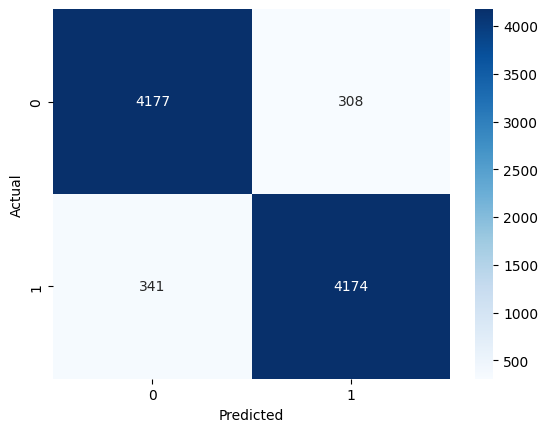

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


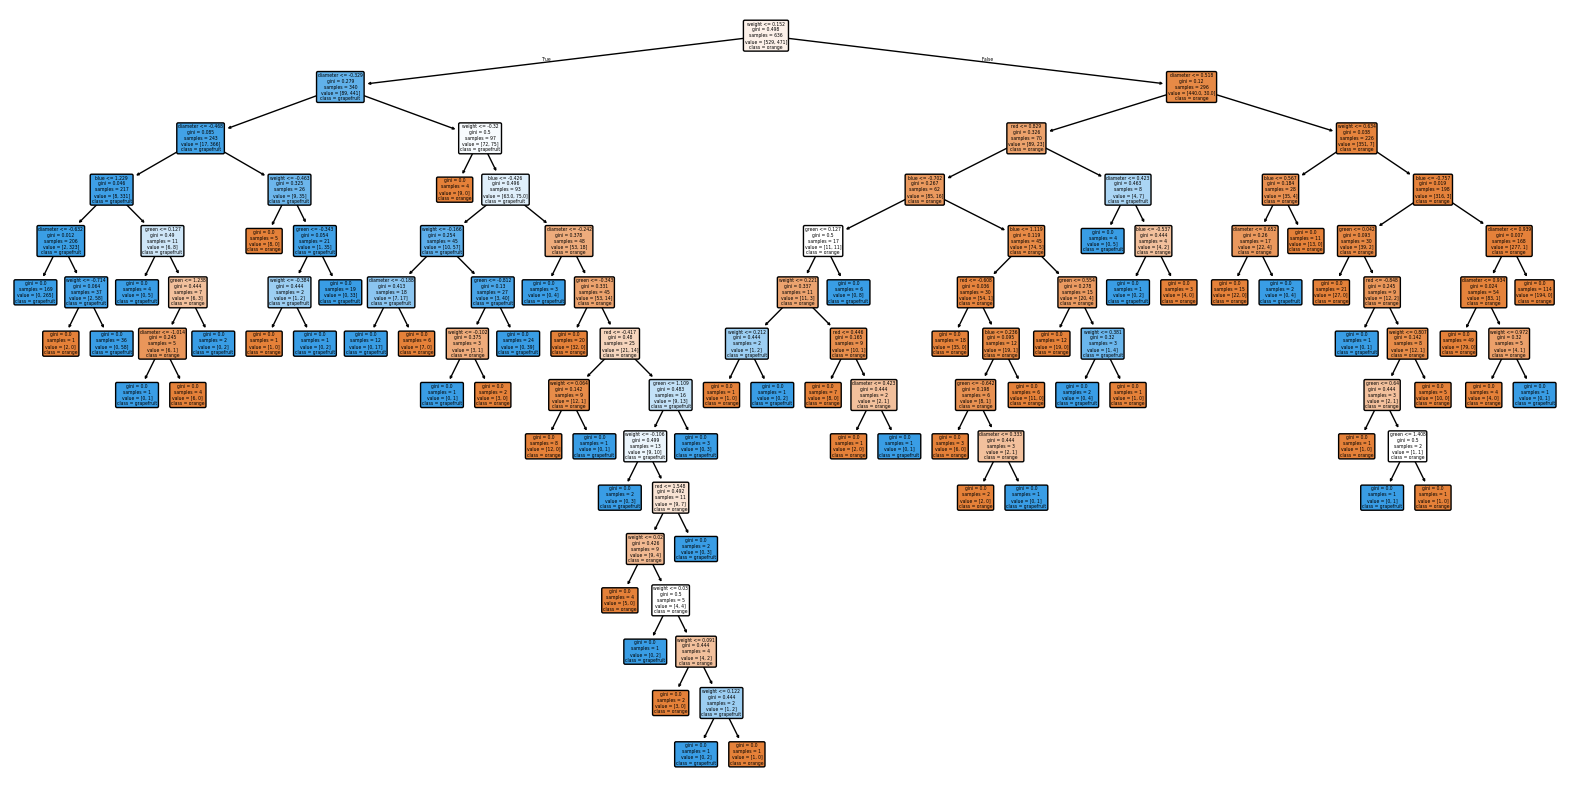

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualisasikan pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0],  # Ambil pohon pertama dari Random Forest
          filled=True,  # Mewarnai node dengan kelas yang diprediksi
          feature_names=df.columns,  # Nama fitur (misalnya df.columns)
          class_names=[
              'orange', 'grapefruit'
          ],  # Nama kelas target (nama spesies ikan)
          rounded=True)  # Membuat sudut node membulat
plt.show()


KLASIFIKASI DATA BARU

In [21]:
#Klasifikasi Data Baru

new_data = [[ 15.35 , 253.89 , 149   ,  77   , 20]]
new_data_scaler = sc.transform(new_data)
pred = rf.predict(new_data_scaler)

print("Data Baru adalah : ", pred)

Data Baru adalah :  ['grapefruit']


SAVE MODEL

In [22]:
import pickle

# Simpan scaler
with open('scaler_rf_fruit.sav', 'wb') as file:
    pickle.dump(sc, file)

# Simpan model
with open('rf_model_fruit.sav', 'wb') as file:
    pickle.dump(rf, file)

# Load the model
with open('rf_model_fruit.sav', 'rb') as file:
    loaded_model = pickle.load(file)
with open('scaler_rf_fruit.sav', 'rb') as file:
    loaded_scaler = pickle.load(file)